## **Power Plant Optimization Using Data-Driven Models**
### **Project Summary**  
This project aims to optimize coal-fired power plant operations using machine learning and data analytics. By analyzing sensor data (e.g., coal flow, burner tilt angles, steam temperatures), the model identifies inefficiencies and recommends adjustments to **maximize electricity output (Generator MW)** while minimizing fuel consumption and emissions. Key techniques include predictive modeling (LSTM, Random Forest) and optimization algorithms (PSO, Genetic Algorithms).



### **Dataset Parameters**  
The dataset includes **70+ columns** from a thermal power plant’s operational logs. Key parameters:  
1. **Output Variable**:  
   - `GENERATOR MW`: Electrical power output (target variable).  
2. **Input Variables**:  
   - **Fuel & Combustion**: `TOTAL COAL FLOW`, `HFO/LDO BNR DMPR POS` (fuel damper positions).  
   - **Airflow**: `TOTAL AIR FLOW`, `FURNACE DRAFT PRESS`.  
   - **Steam Cycle**: `MS LINE TEMP`, `1RY SH DSH FW FLOW`.  
   - **Burner Control**: `[1-8]CORNER BURNER TILTING DRIVE`, `AA (L) CRNR DMPR`.  
   - **Environmental**: `SH ECO O/L FLUE GAS DMPR` (emissions control).  



### **What is a Power Plant & How Does It Work?**  
### **Definition**  
A power plant converts **primary energy** (coal, gas, nuclear) into **electrical energy**.  

### **Working Process (Coal-Fired)**:  
1. **Combustion**: Coal is pulverized and burned in a furnace, producing heat.  
2. **Steam Generation**: Heat converts water into high-pressure steam in boilers.  
3. **Turbine Rotation**: Steam spins turbines connected to generators.  
4. **Power Generation**: Generators convert mechanical energy to electricity via electromagnetic induction.  
5. **Condensation**: Steam is cooled back to water in condensers for reuse.  



### **Uses in Industries**  
Power plants are critical for:  
1. **Electricity Supply**: Manufacturing, steel mills, data centers.  
2. **Combined Heat and Power (CHP)**: Simultaneous electricity and steam production for industries like paper, chemicals.  
3. **Grid Stability**: Baseload and peaking plants ensure uninterrupted supply.  



### **Process Optimization in Power Plants**  
### **Definition**  
Process optimization involves adjusting operational parameters (e.g., coal flow, air ratio) to improve **efficiency**, **reliability**, and **sustainability**.  

### **How It Works**  
1. **Data Collection**: Sensors log parameters (e.g., `TOTAL AIR FLOW`, `MS LINE TEMP`).  
2. **Model Training**: ML algorithms predict Generator MW based on inputs.  
3. **Optimization**: Algorithms identify parameter combinations that maximize output while meeting constraints (e.g., NOx < 250 ppm).  
4. **Implementation**: Recommendations are deployed via the plant’s control system.  

### **Example**:  
Adjusting `BURNER TILTING DRIVE` angles by 5° improves heat distribution, raising efficiency by 2% and Generator MW by 10 MW.  



### **Why Optimization is Crucial & Beneficial**  
1. **Fuel Costs**: Coal accounts for ~40% of operational costs; optimization reduces waste.  
2. **Emissions Compliance**: Stricter regulations (e.g., EPA limits) require efficient combustion to cut CO2/NOx.  
3. **Grid Demand**: Rapid load changes (e.g., renewable intermittency) demand agile responses.  
4. **Benefits**:  
   - **5–10% higher efficiency** → Saves $1M/year for a 500 MW plant.  
   - **20% fewer unplanned outages** via predictive maintenance.  



### **Current Industry Practices**  
1. **Traditional Methods**:  
   - Manual adjustments based on operator experience.  
   - PID controllers for basic parameter regulation.  
2. **Modern Data-Driven Approaches**:  
   - **Digital Twins**: Simulate plant behavior for scenario testing (e.g., GE Digital).  
   - **AI/ML Models**:  
     - **Predictive Maintenance**: Siemens uses LSTM to forecast turbine failures.  
     - **Real-Time Optimization**: Google’s DeepMind reduced cooling costs by 40% in data centers.  
3. **Challenges**:  
   - Siloed data systems (SCADA, ERP).  
   - Resistance to replacing legacy control systems.  


### **Implementation Roadmap for Your Project**  
1. **Data Preprocessing**: Clean, normalize, and derive features (e.g., air-to-fuel ratio).  
2. **Exploratory Analysis**: Identify correlations (e.g., `TOTAL COAL FLOW` vs. `GENERATOR MW`).  
3. **Model Development**:  
   - **Predictive**: Train LSTM to forecast Generator MW.  
   - **Prescriptive**: Use Genetic Algorithms to optimize coal/air ratios.  
4. **Validation**: Test in a digital twin (e.g., MATLAB Simulink) before live deployment.  


Let's start importing the datset and exploring it 

In [21]:
import numpy as np 
import pandas as pd
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [22]:
df = pd.read_csv('Boiler Process Optimization.csv')
df

,GENERATOR MW,TOTAL COAL FLOW BEF CAL CORR,TOTAL AIR FLOW(t/h),FURNACE DRAFT PRESS,AA (L) CRNR 1 AA DMPR FB,AA (L) CRNR 2 AA DMPR FB,AA (L) CRNR 3 AA DMPR FB,AA (L) CRNR 4 AA DMPR FB,AA (L) CRNR 5 AA DMPR FB,AA (L) CRNR 6 AA DMPR FB,...,2RY SH B O/L TEMP,3RY SH A I/L TEMP,3RY SH B I/L TEMP,1RY RHTR O/L TEMP 1,1RY RHTR O/L TEMP 2,2RY RH-A I/L STM TEMP,2RY RH-B I/L STM TEMP,2RY RH-A O/L TEMP,2RY RH-B O/L TEMP,RH DSH FW FLOW
0,690.6,356.0,2361.1,-9.20,55.8,50.8,47.6,47.3,39.3,49.9,...,552.4,537.4,535.7,498.5,502.9,497.6,496.7,597.4,594.5,0
1,691.0,355.9,2357.4,-8.46,55.8,50.9,47.6,47.3,39.3,49.9,...,552.4,537.3,535.7,498.3,502.7,497.5,496.6,597.4,594.3,0
2,690.8,355.8,2359.6,-10.49,55.8,50.9,47.6,47.3,39.3,49.9,...,552.9,537.1,535.9,498.5,502.6,497.5,496.6,597.5,594.3,0
3,690.7,355.5,2358.5,-11.05,55.8,50.9,47.6,47.3,39.3,49.9,...,553.4,536.5,536.5,498.5,502.6,497.7,496.6,597.5,594.3,0
4,690.8,355.3,2355.9,-9.57,55.8,50.9,47.5,47.3,39.3,49.9,...,553.8,536.3,536.9,498.6,502.6,497.6,496.6,597.5,594.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17275,688.5,346.8,2354.4,-8.48,54.8,46.9,57.0,56.3,51.2,66.4,...,559.1,539.4,540.9,504.2,506.4,503.1,499.8,601.4,597.1,0
17276,688.0,347.0,2361.8,-10.02,54.9,46.9,57.0,56.2,51.3,66.4,...,559.0,539.0,541.2,504.1,506.5,503.2,499.8,601.3,597.2,0
17277,688.0,347.1,2361.5,-10.92,54.9,47.0,57.0,56.3,51.3,66.4,...,559.3,538.7,541.6,504.0,506.4,502.9,499.9,601.1,597.3,0
17278,688.0,347.4,2366.0,-10.91,54.8,46.9,57.0,56.4,51.3,66.4,...,559.5,538.2,542.1,504.0,506.7,503.1,499.8,601.2,597.1,0


In [23]:
df_copy = df.copy()

In [24]:
df

,GENERATOR MW,TOTAL COAL FLOW BEF CAL CORR,TOTAL AIR FLOW(t/h),FURNACE DRAFT PRESS,AA (L) CRNR 1 AA DMPR FB,AA (L) CRNR 2 AA DMPR FB,AA (L) CRNR 3 AA DMPR FB,AA (L) CRNR 4 AA DMPR FB,AA (L) CRNR 5 AA DMPR FB,AA (L) CRNR 6 AA DMPR FB,...,2RY SH B O/L TEMP,3RY SH A I/L TEMP,3RY SH B I/L TEMP,1RY RHTR O/L TEMP 1,1RY RHTR O/L TEMP 2,2RY RH-A I/L STM TEMP,2RY RH-B I/L STM TEMP,2RY RH-A O/L TEMP,2RY RH-B O/L TEMP,RH DSH FW FLOW
0,690.6,356.0,2361.1,-9.20,55.8,50.8,47.6,47.3,39.3,49.9,...,552.4,537.4,535.7,498.5,502.9,497.6,496.7,597.4,594.5,0
1,691.0,355.9,2357.4,-8.46,55.8,50.9,47.6,47.3,39.3,49.9,...,552.4,537.3,535.7,498.3,502.7,497.5,496.6,597.4,594.3,0
2,690.8,355.8,2359.6,-10.49,55.8,50.9,47.6,47.3,39.3,49.9,...,552.9,537.1,535.9,498.5,502.6,497.5,496.6,597.5,594.3,0
3,690.7,355.5,2358.5,-11.05,55.8,50.9,47.6,47.3,39.3,49.9,...,553.4,536.5,536.5,498.5,502.6,497.7,496.6,597.5,594.3,0
4,690.8,355.3,2355.9,-9.57,55.8,50.9,47.5,47.3,39.3,49.9,...,553.8,536.3,536.9,498.6,502.6,497.6,496.6,597.5,594.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17275,688.5,346.8,2354.4,-8.48,54.8,46.9,57.0,56.3,51.2,66.4,...,559.1,539.4,540.9,504.2,506.4,503.1,499.8,601.4,597.1,0
17276,688.0,347.0,2361.8,-10.02,54.9,46.9,57.0,56.2,51.3,66.4,...,559.0,539.0,541.2,504.1,506.5,503.2,499.8,601.3,597.2,0
17277,688.0,347.1,2361.5,-10.92,54.9,47.0,57.0,56.3,51.3,66.4,...,559.3,538.7,541.6,504.0,506.4,502.9,499.9,601.1,597.3,0
17278,688.0,347.4,2366.0,-10.91,54.8,46.9,57.0,56.4,51.3,66.4,...,559.5,538.2,542.1,504.0,506.7,503.1,499.8,601.2,597.1,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17280 entries, 0 to 17279
Columns: 116 entries, GENERATOR MW to RH DSH FW FLOW
dtypes: float64(113), int64(3)
memory usage: 15.3 MB


In [26]:
df.describe()

,GENERATOR MW,TOTAL COAL FLOW BEF CAL CORR,TOTAL AIR FLOW(t/h),FURNACE DRAFT PRESS,AA (L) CRNR 1 AA DMPR FB,AA (L) CRNR 2 AA DMPR FB,AA (L) CRNR 3 AA DMPR FB,AA (L) CRNR 4 AA DMPR FB,AA (L) CRNR 5 AA DMPR FB,AA (L) CRNR 6 AA DMPR FB,...,2RY SH B O/L TEMP,3RY SH A I/L TEMP,3RY SH B I/L TEMP,1RY RHTR O/L TEMP 1,1RY RHTR O/L TEMP 2,2RY RH-A I/L STM TEMP,2RY RH-B I/L STM TEMP,2RY RH-A O/L TEMP,2RY RH-B O/L TEMP,RH DSH FW FLOW
count,17280.000000,17280.000000,17280.000000,17280.000000,17280.000000,17280.000000,17280.000000,17280.000000,17280.000000,17280.000000,...,17280.000000,17280.000000,17280.000000,17280.000000,17280.000000,17280.000000,17280.000000,17280.000000,17280.000000,17280.000000
mean,687.993235,346.539988,2375.491505,-10.038014,58.479705,56.046238,51.865648,52.207992,46.932969,57.698194,...,554.011516,537.625556,536.475937,501.440903,506.942552,500.231377,500.153872,596.039433,596.072245,0.025405
std,5.151300,10.951563,28.059112,1.182714,6.557772,7.240884,2.535248,4.480486,6.920929,4.068884,...,5.202913,3.211057,2.106180,3.037235,3.013657,3.220014,2.959221,2.222460,2.073656,0.157357
min,619.400000,285.300000,2131.300000,-27.500000,51.100000,46.900000,47.300000,47.300000,37.500000,49.900000,...,533.200000,521.800000,526.500000,492.800000,497.600000,480.300000,489.000000,589.300000,586.600000,0.000000
25%,687.700000,339.300000,2360.300000,-10.790000,52.700000,50.000000,51.600000,48.300000,39.300000,58.500000,...,551.000000,535.700000,535.100000,499.200000,505.200000,498.100000,498.600000,594.500000,594.800000,0.000000
50%,688.500000,345.600000,2373.000000,-10.030000,54.900000,50.300000,52.400000,48.400000,44.800000,58.700000,...,553.900000,537.700000,536.500000,501.700000,507.200000,500.600000,500.400000,596.000000,596.300000,0.000000
75%,689.200000,354.000000,2389.600000,-9.280000,65.300000,60.700000,52.800000,57.000000,53.300000,59.000000,...,556.900000,539.700000,537.700000,503.800000,509.300000,502.600000,502.500000,597.500000,597.500000,0.000000
max,713.300000,397.800000,2523.200000,-3.830000,73.700000,69.100000,57.600000,57.100000,58.700000,66.400000,...,590.900000,558.700000,546.800000,514.600000,519.100000,509.000000,508.000000,605.500000,602.500000,1.000000


We see here that mean and 50%,75% are nearer adn we can observe the dats is well structured 
Now lets find any missing and 'nan' Values

In [27]:
df.isnull().sum()


GENERATOR MW                    0
TOTAL COAL FLOW BEF CAL CORR    0
TOTAL AIR FLOW(t/h)             0
FURNACE DRAFT PRESS             0
AA (L) CRNR 1 AA DMPR  FB       0
                               ..
2RY RH-A I/L STM TEMP           0
2RY RH-B I/L STM TEMP           0
2RY RH-A O/L TEMP               0
2RY RH-B O/L TEMP               0
RH DSH FW FLOW                  0
Length: 116, dtype: int64

we see here there is no missin values so we can go with
## Exploratory Analysis and Visualization

In [28]:
fig = px.histogram(df,x='GENERATOR MW',marginal='box',nbins = 100,title='Distrubtion of GENERATOR MW')
fig.update_layout(bargap=0.2)
fig.show()

We can observe that there are bunch of outliers and max values are in between 680-700

In [29]:
fig = px.histogram(df,x='TOTAL COAL FLOW BEF CAL CORR',marginal='box',nbins = 100,title='Distrubtion of TOTAL COAL FLOW BEF CAL CORR')
fig.update_layout(bargap=0.2)
fig.show()

In [30]:
fig = px.histogram(df,x='TOTAL AIR FLOW(t/h)',marginal='box',nbins = 100,title='Distrubtion of TOTAL AIR FLOW(t/h)')
fig.update_layout(bargap=0.2)
fig.show()

In [31]:
import plotly.express as px
fig = px.scatter(df, 
                 x='GENERATOR MW', 
                 y='TOTAL COAL FLOW BEF CAL CORR', 
                 opacity=1, 
                 title='GENERATOR MW VS TOTAL COAL FLOW BEF CAL CORR', 
                 color='TOTAL COAL FLOW BEF CAL CORR',
                 color_discrete_sequence=['blue','red'])


fig.update_traces(marker=dict(size=2))


fig.update_layout(width=1200, height=700)

fig.show()


In [32]:
import plotly.express as px
fig = px.scatter(df, 
                 x='GENERATOR MW', 
                 y='TOTAL AIR FLOW(t/h)', 
                 opacity=1, 
                 title='GENERATOR MW VS TOTAL AIR FLOW(t/h)', 
                 color='TOTAL COAL FLOW BEF CAL CORR',
                 color_discrete_sequence=['blue','red'])


fig.update_traces(marker=dict(size=2))


fig.update_layout(width=1200, height=700)

fig.show()

In [33]:
df


,GENERATOR MW,TOTAL COAL FLOW BEF CAL CORR,TOTAL AIR FLOW(t/h),FURNACE DRAFT PRESS,AA (L) CRNR 1 AA DMPR FB,AA (L) CRNR 2 AA DMPR FB,AA (L) CRNR 3 AA DMPR FB,AA (L) CRNR 4 AA DMPR FB,AA (L) CRNR 5 AA DMPR FB,AA (L) CRNR 6 AA DMPR FB,...,2RY SH B O/L TEMP,3RY SH A I/L TEMP,3RY SH B I/L TEMP,1RY RHTR O/L TEMP 1,1RY RHTR O/L TEMP 2,2RY RH-A I/L STM TEMP,2RY RH-B I/L STM TEMP,2RY RH-A O/L TEMP,2RY RH-B O/L TEMP,RH DSH FW FLOW
0,690.6,356.0,2361.1,-9.20,55.8,50.8,47.6,47.3,39.3,49.9,...,552.4,537.4,535.7,498.5,502.9,497.6,496.7,597.4,594.5,0
1,691.0,355.9,2357.4,-8.46,55.8,50.9,47.6,47.3,39.3,49.9,...,552.4,537.3,535.7,498.3,502.7,497.5,496.6,597.4,594.3,0
2,690.8,355.8,2359.6,-10.49,55.8,50.9,47.6,47.3,39.3,49.9,...,552.9,537.1,535.9,498.5,502.6,497.5,496.6,597.5,594.3,0
3,690.7,355.5,2358.5,-11.05,55.8,50.9,47.6,47.3,39.3,49.9,...,553.4,536.5,536.5,498.5,502.6,497.7,496.6,597.5,594.3,0
4,690.8,355.3,2355.9,-9.57,55.8,50.9,47.5,47.3,39.3,49.9,...,553.8,536.3,536.9,498.6,502.6,497.6,496.6,597.5,594.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17275,688.5,346.8,2354.4,-8.48,54.8,46.9,57.0,56.3,51.2,66.4,...,559.1,539.4,540.9,504.2,506.4,503.1,499.8,601.4,597.1,0
17276,688.0,347.0,2361.8,-10.02,54.9,46.9,57.0,56.2,51.3,66.4,...,559.0,539.0,541.2,504.1,506.5,503.2,499.8,601.3,597.2,0
17277,688.0,347.1,2361.5,-10.92,54.9,47.0,57.0,56.3,51.3,66.4,...,559.3,538.7,541.6,504.0,506.4,502.9,499.9,601.1,597.3,0
17278,688.0,347.4,2366.0,-10.91,54.8,46.9,57.0,56.4,51.3,66.4,...,559.5,538.2,542.1,504.0,506.7,503.1,499.8,601.2,597.1,0


For traininig a machine learning model we need to scale the data for that we will use Robust Scaling (Best for Outliers & Negative Values)

In [34]:
import pandas as pd
from sklearn.preprocessing import RobustScaler

# Compute IQR for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers for each column
df_clipped = df.apply(lambda x: x.clip(lower=lower_bound[x.name], upper=upper_bound[x.name]))

# Apply Robust Scaling
scaler = RobustScaler()
df_scaled = scaler.fit_transform(df_clipped)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

df1 = df_scaled.copy()


In [35]:
df1


,GENERATOR MW,TOTAL COAL FLOW BEF CAL CORR,TOTAL AIR FLOW(t/h),FURNACE DRAFT PRESS,AA (L) CRNR 1 AA DMPR FB,AA (L) CRNR 2 AA DMPR FB,AA (L) CRNR 3 AA DMPR FB,AA (L) CRNR 4 AA DMPR FB,AA (L) CRNR 5 AA DMPR FB,AA (L) CRNR 6 AA DMPR FB,...,2RY SH B O/L TEMP,3RY SH A I/L TEMP,3RY SH B I/L TEMP,1RY RHTR O/L TEMP 1,1RY RHTR O/L TEMP 2,2RY RH-A I/L STM TEMP,2RY RH-B I/L STM TEMP,2RY RH-A O/L TEMP,2RY RH-B O/L TEMP,RH DSH FW FLOW
0,1.400000,0.707483,-0.406143,0.549669,0.071429,0.046729,-2.166667,-0.126437,-0.392857,-1.9,...,-0.254237,-0.075,-0.307692,-0.695652,-1.048780,-0.666667,-0.948718,0.466667,-0.666667,0.0
1,1.666667,0.700680,-0.532423,1.039735,0.071429,0.056075,-2.166667,-0.126437,-0.392857,-1.9,...,-0.254237,-0.100,-0.307692,-0.739130,-1.097561,-0.688889,-0.974359,0.466667,-0.740741,0.0
2,1.533333,0.693878,-0.457338,-0.304636,0.071429,0.056075,-2.166667,-0.126437,-0.392857,-1.9,...,-0.169492,-0.150,-0.230769,-0.695652,-1.121951,-0.688889,-0.974359,0.500000,-0.740741,0.0
3,1.466667,0.673469,-0.494881,-0.675497,0.071429,0.056075,-2.166667,-0.126437,-0.392857,-1.9,...,-0.084746,-0.300,0.000000,-0.695652,-1.121951,-0.644444,-0.974359,0.500000,-0.740741,0.0
4,1.533333,0.659864,-0.583618,0.304636,0.071429,0.056075,-2.166667,-0.126437,-0.392857,-1.9,...,-0.016949,-0.350,0.153846,-0.673913,-1.121951,-0.666667,-0.974359,0.500000,-0.703704,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17275,0.000000,0.081633,-0.634812,1.026490,-0.007937,-0.317757,1.833333,0.908046,0.457143,2.1,...,0.881356,0.425,1.692308,0.543478,-0.195122,0.555556,-0.153846,1.800000,0.296296,0.0
17276,-0.333333,0.095238,-0.382253,0.006623,0.000000,-0.317757,1.833333,0.896552,0.464286,2.1,...,0.864407,0.325,1.807692,0.521739,-0.170732,0.577778,-0.153846,1.766667,0.333333,0.0
17277,-0.333333,0.102041,-0.392491,-0.589404,0.000000,-0.308411,1.833333,0.908046,0.464286,2.1,...,0.915254,0.250,1.961538,0.500000,-0.195122,0.511111,-0.128205,1.700000,0.370370,0.0
17278,-0.333333,0.122449,-0.238908,-0.582781,-0.007937,-0.317757,1.833333,0.919540,0.464286,2.1,...,0.949153,0.125,1.961538,0.500000,-0.121951,0.555556,-0.153846,1.733333,0.296296,0.0


As data is scaled now we have to remove less/no afftect features for model training as they can lead to mis predction 

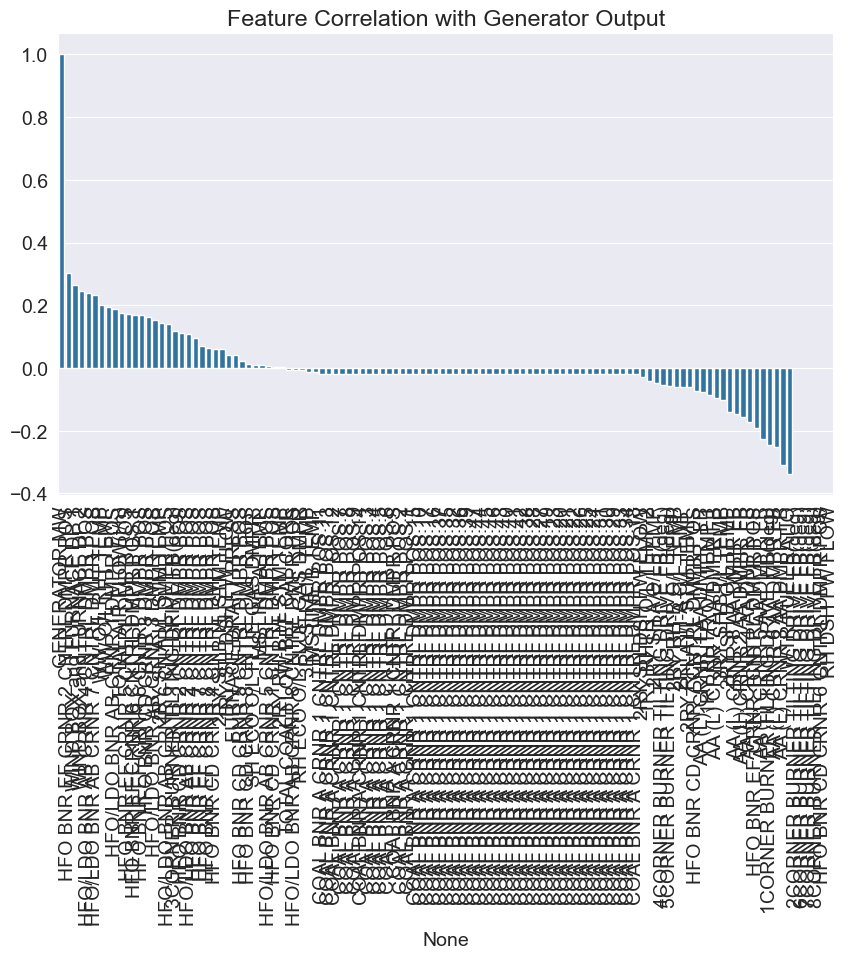

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation with Generator Output
correlation = df1.corr()['GENERATOR MW'].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation.index, y=correlation.values)
plt.xticks(rotation=90)
plt.title("Feature Correlation with Generator Output")
plt.show()


As we can see there a lot of columns which does not much affect our target so we remove all the negitive ones between -0.1 to 0.1 as they have low impact 

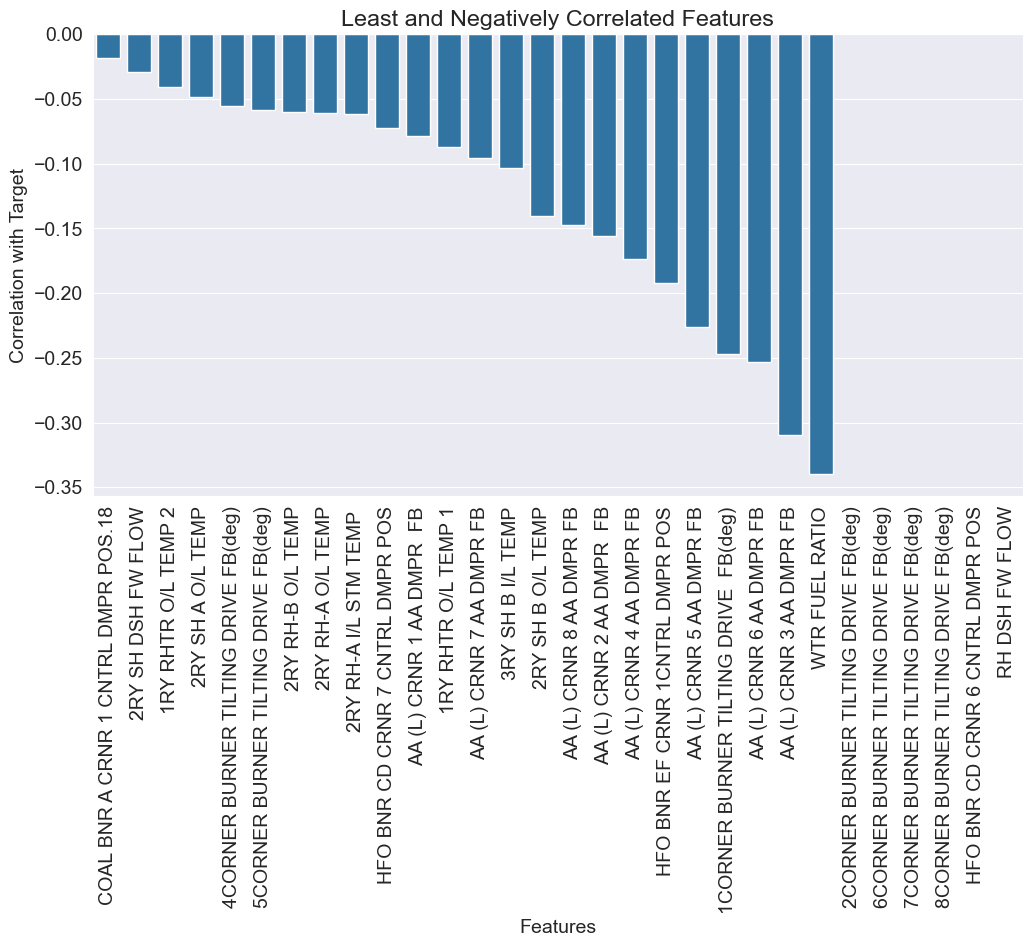

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `correlation` is a Pandas Series with correlation values
negative_features = correlation.tail(30)  # Bottom 20 features (least correlation, including negative ones)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=negative_features.index, y=negative_features.values)
plt.xticks(rotation=90)  # Rotate labels for readability
plt.xlabel("Features")
plt.ylabel("Correlation with Target")
plt.title("Least and Negatively Correlated Features")
plt.show()


In [38]:
# Compute correlation with the target variable
correlation = df1.corr()['GENERATOR MW'].sort_values()

# Set threshold (remove features with weak correlation)
threshold = 0.1
selected_features = correlation[(correlation > threshold) | (correlation < -threshold)].index

# Filter dataset
df_selected = df1[selected_features]

print(f"Selected Features: {selected_features}")


Selected Features: Index(['WTR FUEL RATIO', 'AA (L) CRNR 3 AA DMPR FB',
       'AA (L) CRNR 6 AA DMPR FB', '1CORNER BURNER TILTING DRIVE  FB(deg)',
       'AA (L) CRNR 5 AA DMPR FB', 'HFO BNR EF CRNR 1CNTRL DMPR POS',
       'AA (L) CRNR 4 AA DMPR FB', 'AA (L) CRNR 2 AA DMPR  FB',
       'AA (L) CRNR 8 AA DMPR FB', '2RY SH B O/L TEMP', '3RY SH B I/L TEMP',
       'HFO/LDO BNR AB CRNR 2 CNTRL DMPR POS',
       'HFO BNR CD CRNR 2 CNTRL DMPR POS',
       '3CORNER BURNER TILTING DRIVE FB(deg)',
       'HFO/LDO BNR AB CRNR 6 CNTRL DMPR POS', '2RY SH A I/L STM TEMP',
       'HFO/LDO BNR AB CRNR 3 DMPR POS', 'HFO BNR CD CRNR 3 DMPR POS',
       'HFO BNR EF CRNR 6 CNTRL DMPR POS.1',
       'HFO BNR EF CRNR 6 CNTRL DMPR POS', 'HFO BNR EF CRNR 5 CNTRL DMPR POS',
       'TOTAL AIR FLOW(t/h)', 'HFO/LDO BNR AB CRNR 1 DMPR POS',
       'WW O/L LFT TEMP', 'WW O/L RHT TEMP',
       'HFO/LDO BNR AB CRNR 7 CNTRL DMPR POS',
       'HFO/LDO BNR AB CRNR 4 CNTRL DMPR POS', 'WIND BOX and FURNACE DP 2',
     

In [39]:
df_selected

,WTR FUEL RATIO,AA (L) CRNR 3 AA DMPR FB,AA (L) CRNR 6 AA DMPR FB,1CORNER BURNER TILTING DRIVE FB(deg),AA (L) CRNR 5 AA DMPR FB,HFO BNR EF CRNR 1CNTRL DMPR POS,AA (L) CRNR 4 AA DMPR FB,AA (L) CRNR 2 AA DMPR FB,AA (L) CRNR 8 AA DMPR FB,2RY SH B O/L TEMP,...,TOTAL AIR FLOW(t/h),HFO/LDO BNR AB CRNR 1 DMPR POS,WW O/L LFT TEMP,WW O/L RHT TEMP,HFO/LDO BNR AB CRNR 7 CNTRL DMPR POS,HFO/LDO BNR AB CRNR 4 CNTRL DMPR POS,WIND BOX and FURNACE DP 2,WIND BOX and FURNACE DP 1,HFO BNR EF CRNR 2 CNTRL DMPR POS,GENERATOR MW
0,-2.000000,-2.166667,-1.9,-0.705882,-0.392857,0.8,-0.126437,0.046729,0.000000,-0.254237,...,-0.406143,0.052632,-0.40,-0.388889,2.057692,0.833333,-0.027397,-0.076336,0.90,1.400000
1,-2.000000,-2.166667,-1.9,-0.705882,-0.392857,0.9,-0.126437,0.056075,0.000000,-0.254237,...,-0.532423,0.052632,-0.40,-0.333333,2.057692,0.833333,0.273973,0.328244,0.85,1.666667
2,-2.000000,-2.166667,-1.9,-0.705882,-0.392857,0.9,-0.126437,0.056075,0.000000,-0.169492,...,-0.457338,0.052632,-0.40,-0.388889,2.057692,0.833333,0.198630,0.213740,0.68,1.533333
3,-2.000000,-2.166667,-1.9,-0.705882,-0.392857,0.8,-0.126437,0.056075,0.000000,-0.084746,...,-0.494881,0.052632,-0.35,-0.388889,2.057692,0.833333,0.109589,0.152672,1.23,1.466667
4,-2.000000,-2.166667,-1.9,-0.705882,-0.392857,0.9,-0.126437,0.056075,0.004926,-0.016949,...,-0.583618,0.052632,-0.55,-0.388889,2.057692,0.833333,0.034247,0.106870,0.97,1.533333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17275,-0.186275,1.833333,2.1,-0.705882,0.457143,0.2,0.908046,-0.317757,-0.349754,0.881356,...,-0.634812,1.552632,1.45,1.611111,-1.846154,1.916667,-1.397260,-1.190840,0.33,0.000000
17276,-0.196078,1.833333,2.1,-0.705882,0.464286,0.3,0.896552,-0.317757,-0.354680,0.864407,...,-0.382253,1.552632,1.40,1.666667,-1.865385,1.916667,-1.486301,-1.366412,0.48,-0.333333
17277,-0.205882,1.833333,2.1,-0.705882,0.464286,0.3,0.908046,-0.308411,-0.349754,0.915254,...,-0.392491,1.552632,1.40,1.722222,-1.750000,1.916667,-1.363014,-1.206107,0.36,-0.333333
17278,-0.215686,1.833333,2.1,-0.705882,0.464286,0.2,0.919540,-0.317757,-0.349754,0.949153,...,-0.238908,1.552632,1.35,1.611111,-1.903846,1.916667,-1.328767,-1.137405,0.40,-0.333333


##  FEATURE ENGINEERING

Now we will add some new features to data to train the model

### **2.1 Efficiency-Related Features**
   1. **Air-Fuel Ratio (AFR)**
   - Helps assess combustion efficiency.
   - Higher AFR can indicate excess air, leading to heat loss.   
   2. **Heat Rate Estimation (kJ/kWh)**
   - Approximate energy required to generate 1 kWh of electricity.
   3. **Steam Efficiency Indicator**
   - Ratio of steam temperatures to fuel input.


In [45]:
df1["AIR_FUEL_RATIO"] = df1["TOTAL AIR FLOW(t/h)"] / df1["TOTAL COAL FLOW BEF CAL CORR"]
df1["HEAT_RATE"] = 3600 / df1["GENERATOR MW"]
df1["STEAM_EFFICIENCY"] = df1["1RY SH DSH FW FLOW"] / df1["TOTAL COAL FLOW BEF CAL CORR"]




In [46]:
df1

,GENERATOR MW,TOTAL COAL FLOW BEF CAL CORR,TOTAL AIR FLOW(t/h),FURNACE DRAFT PRESS,AA (L) CRNR 1 AA DMPR FB,AA (L) CRNR 2 AA DMPR FB,AA (L) CRNR 3 AA DMPR FB,AA (L) CRNR 4 AA DMPR FB,AA (L) CRNR 5 AA DMPR FB,AA (L) CRNR 6 AA DMPR FB,...,1RY RHTR O/L TEMP 1,1RY RHTR O/L TEMP 2,2RY RH-A I/L STM TEMP,2RY RH-B I/L STM TEMP,2RY RH-A O/L TEMP,2RY RH-B O/L TEMP,RH DSH FW FLOW,AIR_FUEL_RATIO,HEAT_RATE,STEAM_EFFICIENCY
0,1.400000,0.707483,-0.406143,0.549669,0.071429,0.046729,-2.166667,-0.126437,-0.392857,-1.9,...,-0.695652,-1.048780,-0.666667,-0.948718,0.466667,-0.666667,0.0,-0.574068,2.571429e+03,0.565385
1,1.666667,0.700680,-0.532423,1.039735,0.071429,0.056075,-2.166667,-0.126437,-0.392857,-1.9,...,-0.739130,-1.097561,-0.688889,-0.974359,0.466667,-0.740741,0.0,-0.759866,2.160000e+03,0.856311
2,1.533333,0.693878,-0.457338,-0.304636,0.071429,0.056075,-2.166667,-0.126437,-0.392857,-1.9,...,-0.695652,-1.121951,-0.688889,-0.974359,0.500000,-0.740741,0.0,-0.659105,2.347826e+03,-0.864706
3,1.466667,0.673469,-0.494881,-0.675497,0.071429,0.056075,-2.166667,-0.126437,-0.392857,-1.9,...,-0.695652,-1.121951,-0.644444,-0.974359,0.500000,-0.740741,0.0,-0.734823,2.454545e+03,-1.781818
4,1.533333,0.659864,-0.583618,0.304636,0.071429,0.056075,-2.166667,-0.126437,-0.392857,-1.9,...,-0.673913,-1.121951,-0.666667,-0.974359,0.500000,-0.703704,0.0,-0.884452,2.347826e+03,-0.909278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17275,0.000000,0.081633,-0.634812,1.026490,-0.007937,-0.317757,1.833333,0.908046,0.457143,2.1,...,0.543478,-0.195122,0.555556,-0.153846,1.800000,0.296296,0.0,-7.776451,inf,17.150000
17276,-0.333333,0.095238,-0.382253,0.006623,0.000000,-0.317757,1.833333,0.896552,0.464286,2.1,...,0.521739,-0.170732,0.577778,-0.153846,1.766667,0.333333,0.0,-4.013652,-1.080000e+04,2.100000
17277,-0.333333,0.102041,-0.392491,-0.589404,0.000000,-0.308411,1.833333,0.908046,0.464286,2.1,...,0.500000,-0.195122,0.511111,-0.128205,1.700000,0.370370,0.0,-3.846416,-1.080000e+04,11.760000
17278,-0.333333,0.122449,-0.238908,-0.582781,-0.007937,-0.317757,1.833333,0.919540,0.464286,2.1,...,0.500000,-0.121951,0.555556,-0.153846,1.733333,0.296296,0.0,-1.951081,-1.080000e+04,11.433333


## Machine Learning 

In [48]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load dataset (assuming df1 is preprocessed)
df2 = df1.copy()

# Replace infinities with NaN
df2.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN (or replace with median)
df2.dropna(inplace=True)  # Alternative: df.fillna(df.median(), inplace=True)

# Clip extreme values to avoid too-large numbers (99.9 percentile)
df2 = df2.clip(lower=df2.quantile(0.001), upper=df2.quantile(0.999), axis=1)

# Define features and target variable
X = df2.drop(columns=['GENERATOR MW'])  # Features (drop target column)
y = df2['GENERATOR MW']  # Target variable

# Convert to float32 (optional, for XGBoost efficiency)
X = X.astype(np.float32)
y = y.astype(np.float32)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Train and evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Make predictions
    
    # Calculate performance metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Store results
    results[name] = {'R² Score': r2, 'MAE': mae, 'RMSE': rmse}
    
    # Print results
    print(f"🔹 Model: {name}")
    print(f"✅ R² Score: {r2:.4f}")
    print(f"✅ MAE: {mae:.4f}")
    print(f"✅ RMSE: {rmse:.4f}")
    print("-" * 40)

# Convert results to DataFrame for comparison
results_df = pd.DataFrame(results).T
print("\n📊 Model Comparison:\n", results_df)



🔹 Model: Random Forest
✅ R² Score: 1.0000
✅ MAE: 0.0000
✅ RMSE: 0.0000
----------------------------------------
🔹 Model: XGBoost
✅ R² Score: 1.0000
✅ MAE: 0.0000
✅ RMSE: 0.0001
----------------------------------------

📊 Model Comparison:
                R² Score       MAE      RMSE
Random Forest       1.0  0.000000  0.000000
XGBoost             1.0  0.000032  0.000053
